C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


Index(['full_id', 'osm_id', 'admin_level', 'boundary', 'wikipedia', 'name',
       'cartodb_id', 'created_at', 'updated_at', 'geometry'],
      dtype='object')


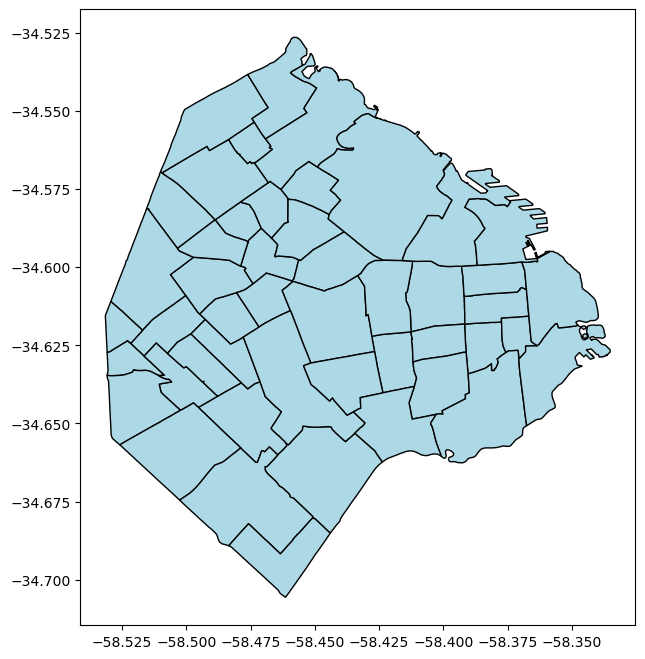

In [25]:
import geopandas as gpd

# Cargar datos de barrios de Buenos Aires
url = 'https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/barrios.geojson'
gdf = gpd.read_file(url)

# Vista preliminar
# print(gdf.head())
# print(gdf.tail())
# print (gdf.info())
gdf.plot(figsize=(10, 8), color='lightblue', edgecolor='black')
print (gdf.columns)


In [31]:
# Explorar columnas del dataset
print(gdf.columns)

# Verificar el CRS del archivo
print(gdf.crs)

# Filtrar barrios con área mayor a un valor específico
gdf['area'] = gdf.geometry.area
#print (gdf['area'])
barrios_grandes = gdf[gdf['area'] > 0.0004]
print(barrios_grandes['area'].head())


Index(['full_id', 'osm_id', 'admin_level', 'boundary', 'wikipedia', 'name',
       'cartodb_id', 'created_at', 'updated_at', 'geometry', 'area'],
      dtype='object')
EPSG:4326
0     0.000465
5     0.000866
13    0.000625
17    0.000673
22    0.000846
Name: area, dtype: float64


C:\Users\mfrch\AppData\Local\Temp\ipykernel_26388\2520046210.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf.geometry.area


<Axes: >

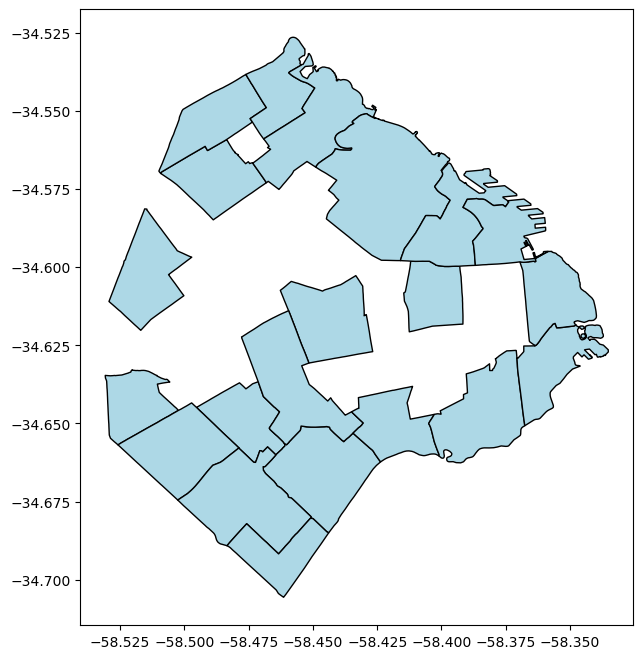

In [29]:
barrios_grandes.plot(figsize=(10, 8), color='lightblue', edgecolor='black')


Index(['full_id', 'osm_id', 'admin_level', 'boundary', 'wikipedia', 'name',
       'cartodb_id', 'created_at', 'updated_at', 'geometry', 'area'],
      dtype='object')
EPSG:4326
EPSG:32721
                   name   area_km2      area    area_gg
0     Parque Avellaneda   4.732017  0.000465   7.011305
1          Constitución   2.095664  0.000206   3.103509
2            Colegiales   2.266021  0.000223   3.351629
3           La Paternal   2.226336  0.000219   3.294686
4      Villa Santa Rita   2.148837  0.000211   3.181395
5         Villa Soldati   8.803787  0.000866  13.049855
6               Coghlan   1.278307  0.000126   1.890059
7      Villa del Parque   3.397266  0.000334   5.028260
8           Parque Chas   1.380542  0.000136   2.042429
9   Villa General Mitre   2.164418  0.000213   3.204018
10                Boedo   2.609650  0.000257   3.865059
11            Chacarita   3.122969  0.000307   4.620627
12     Villa Pueyrredón   3.308390  0.000325   4.894086
13         Villa Devoto   6

C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\Users\mfrch\AppData\Local\Temp\ipykernel_8500\296059575.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf.geometry.area # Areas en lat/long


<Axes: >

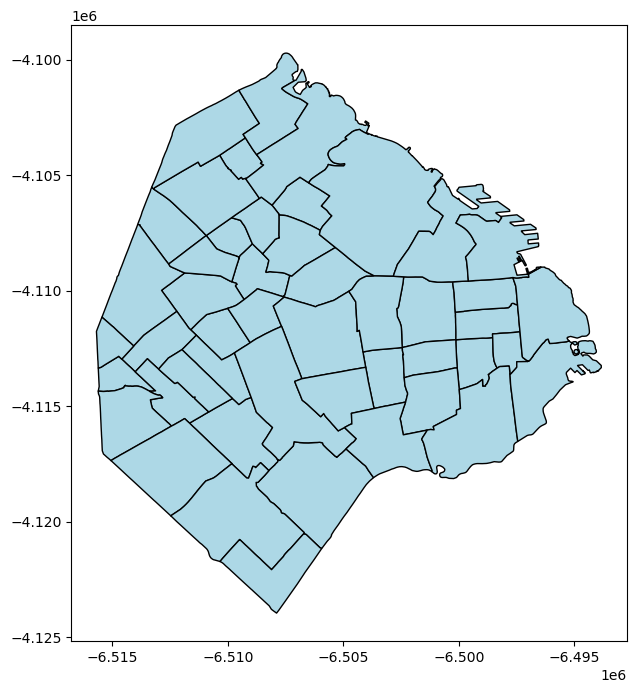

In [125]:
import geopandas as gpd

# Cargar el GeoJSON desde la URL
url = 'https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/barrios.geojson'
gdf = gpd.read_file(url)

# Inspeccionar las columnas disponibles
gdf['area'] = gdf.geometry.area # Areas en lat/long
print(gdf.columns)

# Verificar el CRS actual
print(gdf.crs)

# Reproyectar si el CRS es geográfico (WGS84)
if gdf.crs.to_string() == 'EPSG:4326':  # CRS en grados
    gdf = gdf.to_crs('EPSG:32721')  # UTM zona 21S para Buenos Aires
print(gdf.crs)

# Calcular áreas en km²
gdf['area_km2'] = gdf.geometry.area / 1e6  # Convertir de m² a km²

if gdf.crs.to_string() == 'EPSG:32721':
    gdf = gdf.to_crs('EPSG:3857')
    
gdf['area_gg'] = gdf.geometry.area / 1e6

# Mostrar nombre del barrio y su área
print(gdf[['name', 'area_km2','area','area_gg']])

# Exportar a un archivo CSV (opcional)
gdf[['name', 'area_km2','area']].to_csv('barrios_areas.csv', index=False)

gdf.plot(figsize=(10, 8), color='lightblue', edgecolor='black')


In [127]:
import geopandas as gpd

# Cargar el GeoJSON desde la URL
url = 'https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/barrios.geojson'
gdf = gpd.read_file(url)

# Inspeccionar las columnas disponibles
print(gdf.columns)

# Verificar el CRS actual
print(gdf.crs)

# Reproyectar si el CRS es geográfico (WGS84)
if gdf.crs.to_string() == 'EPSG:4326':  # CRS en grados
    gdf = gdf.to_crs('EPSG:32721')  # UTM zona 21S para Buenos Aires

# Calcular áreas en km²
gdf['area_km2'] = gdf.geometry.area / 1e6  # Convertir de m² a km²

# Mostrar nombre del barrio y su área
#print(gdf[['name', 'area_km2']])

# Exportar a un archivo CSV (opcional)
gdf[['name', 'area_km2']].to_csv('barrios_areas.csv', index=False)


Index(['full_id', 'osm_id', 'admin_level', 'boundary', 'wikipedia', 'name',
       'cartodb_id', 'created_at', 'updated_at', 'geometry'],
      dtype='object')
EPSG:4326


C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


EPSG:32721


<Axes: >

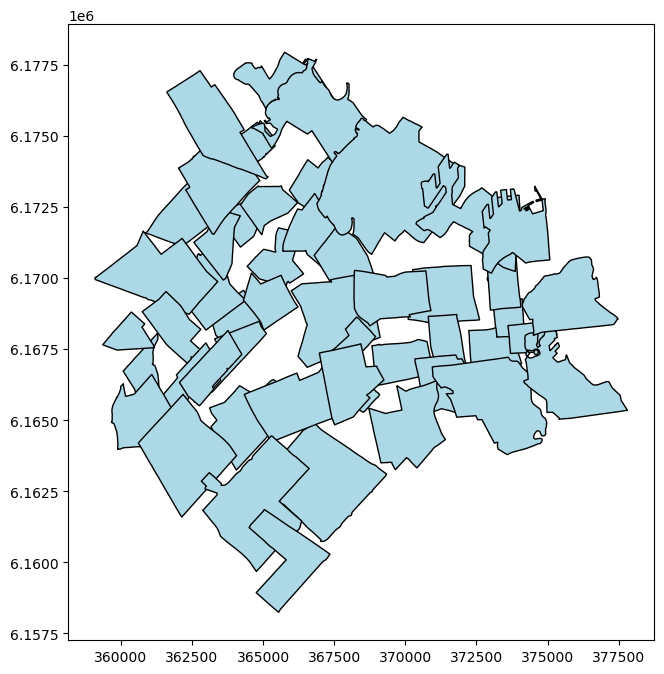

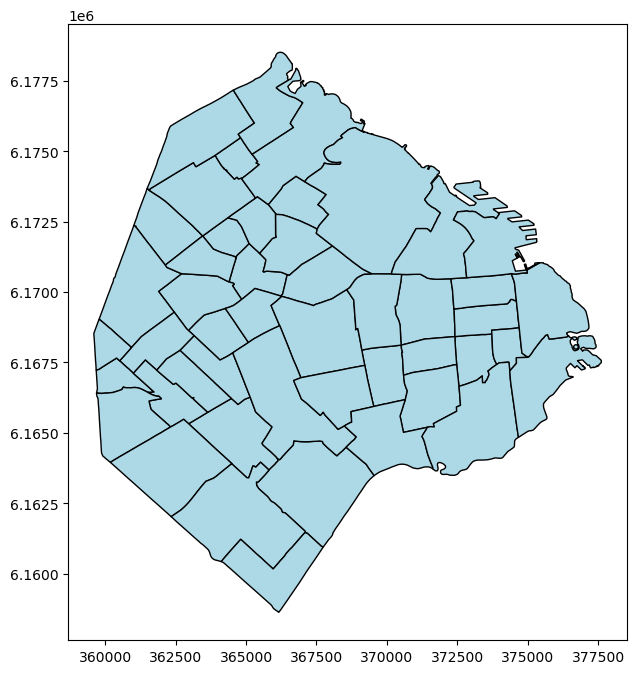

In [133]:
#Ejemplo y trabajo con  EPSG:32721
gdf_x = gdf.to_crs('EPSG:32721')[['name','geometry']].copy()
print(gdf.crs)
gdf_x['area_simple'] = gdf_x.geometry.area
gdf_x['size'] = gdf_x.geometry.length
gdf_x[['a','b','c','d']]= gdf_x.geometry.bounds
gdf_x['centroid'] = gdf_x.geometry.centroid
gdf_x['geometry'] = gdf_x.geometry.rotate(90)
# is_valid
# is_simple
# is_empty
# is_ring

#print (gdf_x[['area_simple','name','size','centroid']].head())
#print (gdf_x.columns)
gdf_x.plot(figsize=(10, 8), color='lightblue', edgecolor='black')
gdf.plot(figsize=(10, 8), color='lightblue', edgecolor='black')

EPSG:4326


C:\Users\mfrch\AppData\Local\Temp\ipykernel_8500\1656937798.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_y['area_simple'] = gdf_y.geometry.area
C:\Users\mfrch\AppData\Local\Temp\ipykernel_8500\1656937798.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_y['size'] = gdf_y.geometry.length
C:\Users\mfrch\AppData\Local\Temp\ipykernel_8500\1656937798.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_y['centroid'] = gdf_y.geometry.centroid


<Axes: >

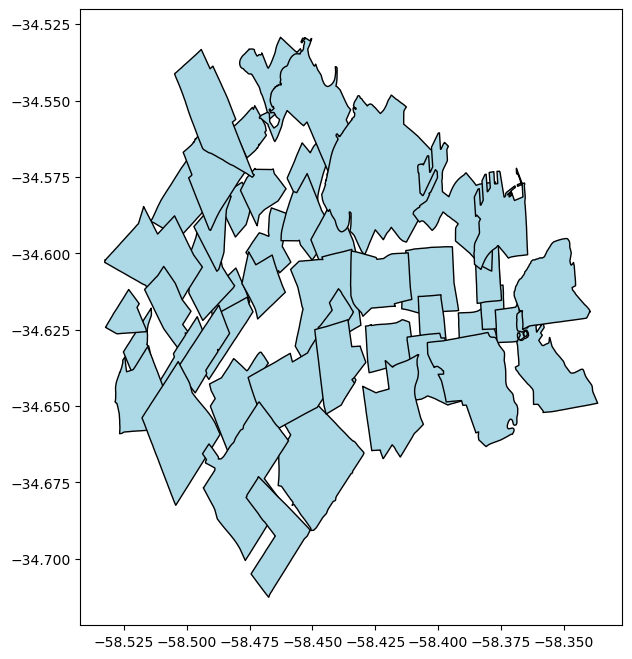

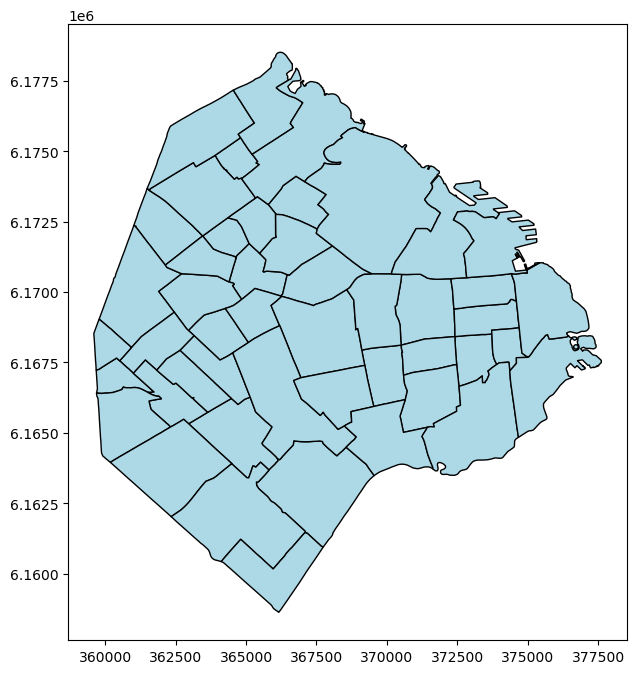

In [123]:
#Ejemplo y trabajo con  'EPSG:4326'
gdf_y = gdf.to_crs('EPSG:4326')[['name','geometry']].copy()
print(gdf_y.crs)
gdf_y['area_simple'] = gdf_y.geometry.area
gdf_y['size'] = gdf_y.geometry.length
gdf_y[['a','b','c','d']]= gdf_y.geometry.bounds
gdf_y['centroid'] = gdf_y.geometry.centroid
gdf_y['geometry'] = gdf_y.geometry.rotate(90)
# is_valid
# is_simple
# is_empty
# is_ring

#print (gdf_y[['area_simple','name','size','centroid']].head())
#print (gdf_y.columns)
gdf_y.plot(figsize=(10, 8), color='lightblue', edgecolor='black')
gdf.plot(figsize=(10, 8), color='lightblue', edgecolor='black')

EPSG:32633


<Axes: >

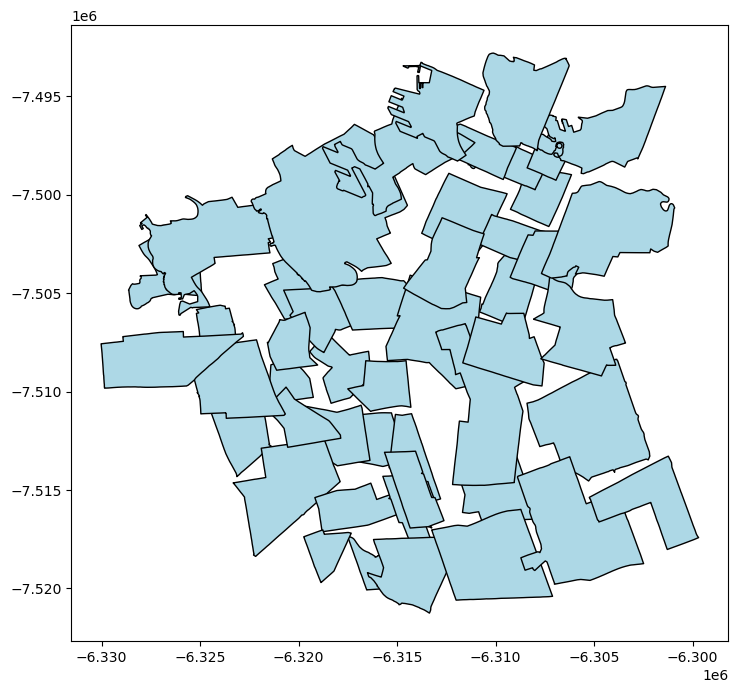

In [121]:
#EPSG:32633
#Ejemplo y trabajo con  'EPSG:32633'
gdf_z = gdf.to_crs('EPSG:32633')[['name','geometry']].copy()
print(gdf_z.crs)
gdf_z['area_simple'] = gdf_z.geometry.area
gdf_z['size'] = gdf_z.geometry.length
gdf_z[['a','b','c','d']]= gdf_z.geometry.bounds
gdf_z['centroid'] = gdf_z.geometry.centroid
gdf_z['geometry'] = gdf_z.geometry.rotate(90)
# is_valid
# is_simple
# is_empty
# is_ring

#print (gdf_z[['area_simple','name','size','centroid']].head())
#print (gdf_z.columns)
gdf_z.plot(figsize=(10, 8), color='lightblue', edgecolor='black')
#gdf.plot(figsize=(10, 8), color='lightblue', edgecolor='black')

In [89]:
print (gdf[['name','area_km2','area_simple']])

                   name   area_km2  area_simple
0     Parque Avellaneda   4.732017     0.000465
1          Constitución   2.095664     0.000206
2            Colegiales   2.266021     0.000223
3           La Paternal   2.226336     0.000219
4      Villa Santa Rita   2.148837     0.000211
5         Villa Soldati   8.803787     0.000866
6               Coghlan   1.278307     0.000126
7      Villa del Parque   3.397266     0.000334
8           Parque Chas   1.380542     0.000136
9   Villa General Mitre   2.164418     0.000213
10                Boedo   2.609650     0.000257
11            Chacarita   3.122969     0.000307
12     Villa Pueyrredón   3.308390     0.000325
13         Villa Devoto   6.356899     0.000625
14            Agronomía   2.116223     0.000208
15        Villa Ortúzar   1.862104     0.000183
16         Villa Crespo   3.611140     0.000355
17            Caballito   6.843890     0.000673
18         Monte Castro   2.627162     0.000258
19             Floresta   2.318612     0

<Axes: >

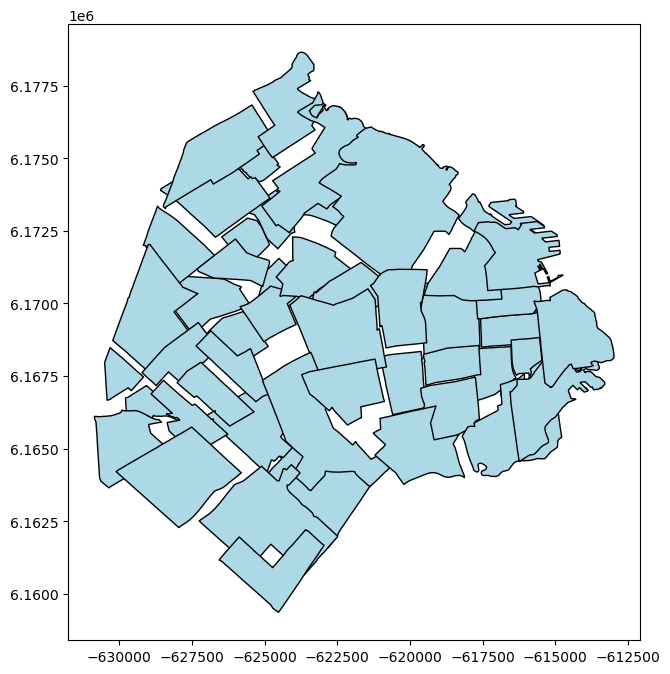

In [69]:
gdf['geometry'].scale(20,1)
gdf.plot(figsize=(10, 8), color='lightblue', edgecolor='black')

In [75]:
#gdf['wkt']=gdf['geometry'].apply(lambda g: g.to_wkt())
# to_wkb
# print (gdf['wkt'])
#gdf.plot(figsize=(10, 8), color='lightblue', edgecolor='black')

AttributeError: 'MultiPolygon' object has no attribute 'to_wkt'

In [15]:
# Ver CRS actual
print(gdf.crs)
# Cambiar a UTM (Zona 21S para Buenos Aires)
gdf_utm = gdf.to_crs('EPSG:4326')

print(gdf_utm.crs)
gdf_utm = gdf.to_crs('EPSG:32721')
print(gdf_utm.crs)


EPSG:32721
EPSG:4326
EPSG:32721


In [17]:
from pyproj import Transformer

# Crear un transformador
transformer = Transformer.from_crs("EPSG:32633", "EPSG:4326")

# Convertir coordenadas
lat, lon = transformer.transform(500000, 4649776)
print(lat, lon)


41.99999797512836 14.999999999999982


In [19]:
from pyproj import Transformer

# Crear un transformador
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32721")

# Transformar un punto de coordenadas
utm_x, utm_y = transformer.transform(-58.3816, -34.6037)  # Coordenadas de Buenos Aires
print(f"UTM: ({utm_x}, {utm_y})")


UTM: (1794024.9581828185, 3309104.9290849734)


In [5]:
from pyproj.database import get_codes

# Listar todos los códigos CRS de la base de datos EPSG
epsg_crs_codes = get_codes("EPSG", "crs")

# Mostrar algunos ejemplos
print(f"Total EPSG CRS codes: {len(epsg_crs_codes)}")
print(f"Primeros 10 EPSG CRS codes: {epsg_crs_codes[:10]}")


Total EPSG CRS codes: 6943
Primeros 10 EPSG CRS codes: ['10150', '10151', '10156', '10157', '10158', '10160', '10162', '10163', '10164', '10165']


In [93]:
import geopandas as gpd

# Cargar datos desde GeoJSON
url = "https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/barrios.geojson"
gdf = gpd.read_file(url)

# Verificar el CRS actual
print(f"CRS inicial: {gdf.crs}")  # Debe ser WGS84 (EPSG:4326)


CRS inicial: EPSG:4326


C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\ProgramData\anaconda3\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


In [95]:
# Reproyectar a UTM Zona 21S (EPSG:32721)
gdf_utm = gdf.to_crs(epsg=32721)

# Mostrar los primeros valores
print(gdf_utm[['geometry']].head())


                                            geometry
0  MULTIPOLYGON (((365343.394 6163777.324, 365515...
1  MULTIPOLYGON (((373394.951 6166779.244, 373493...
2  MULTIPOLYGON (((366773.689 6174109.327, 366797...
3  MULTIPOLYGON (((365307.801 6170125.768, 365275...
4  MULTIPOLYGON (((363157.830 6168446.281, 363258...


In [97]:
# Guardar como Shapefile
for col in gdf.select_dtypes(include=['datetime64']).columns:
    gdf[col] = gdf[col].dt.strftime('%Y-%m-%d')
gdf = gdf.drop(columns=gdf.select_dtypes(include=['datetime64']).columns)
gdf = gdf.drop(columns=['created_at'])
gdf = gdf.drop(columns=['updated_at'])

print (gdf.head())
gdf.to_file("barrios_utm.shp", driver="ESRI Shapefile")


    full_id   osm_id admin_level        boundary  \
0  r2222250  2222250           9  administrative   
1  r2223078  2223078           9  administrative   
2  r2222175  2222175           9  administrative   
3  r2221308  2221308           9  administrative   
4  r2220602  2220602           9  administrative   

                             wikipedia               name  cartodb_id  \
0  es:Parque Avellaneda (Buenos Aires)  Parque Avellaneda          29   
1       es:Constitución (Buenos Aires)       Constitución          38   
2         es:Colegiales (Buenos Aires)         Colegiales          24   
3                       es:La Paternal        La Paternal           7   
4                  es:Villa Santa Rita   Villa Santa Rita           1   

                                            geometry  
0  MULTIPOLYGON (((-58.46954 -34.65911, -58.46764...  
1  MULTIPOLYGON (((-58.38124 -34.63307, -58.38016...  
2  MULTIPOLYGON (((-58.45231 -34.56615, -58.45205...  
3  MULTIPOLYGON (((-58.46892

C:\Users\mfrch\AppData\Local\Temp\ipykernel_27968\2511027228.py:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("barrios_utm.shp", driver="ESRI Shapefile")


In [99]:
# Cargar un shapefile
gdf_shp = gpd.read_file("barrios_utm.shp")

# Guardar como GeoJSON
gdf_shp.to_file("barrios_utm.geojson", driver="GeoJSON")
gdf_shp.head()

,full_id,osm_id,admin_leve,boundary,wikipedia,name,cartodb_id,geometry
0,r2222250,2222250,9,administrative,es:Parque Avellaneda (Buenos Aires),Parque Avellaneda,29,"POLYGON ((-58.46954 -34.65911, -58.46966 -34.6..."
1,r2223078,2223078,9,administrative,es:Constitución (Buenos Aires),Constitución,38,"POLYGON ((-58.38124 -34.63307, -58.38127 -34.6..."
2,r2222175,2222175,9,administrative,es:Colegiales (Buenos Aires),Colegiales,24,"POLYGON ((-58.45231 -34.56615, -58.45205 -34.5..."
3,r2221308,2221308,9,administrative,es:La Paternal,La Paternal,7,"POLYGON ((-58.46892 -34.60187, -58.46927 -34.6..."
4,r2220602,2220602,9,administrative,es:Villa Santa Rita,Villa Santa Rita,1,"POLYGON ((-58.49263 -34.61673, -58.49371 -34.6..."


In [103]:
# Convertir geometría a WKT para exportar a CSV
gdf_shp['geometry'] = gdf_shp['geometry'].apply(wkt.loads)
#gdf_shp['geometry'] = gdf_shp.geometry.apply(lambda geom: geom.wkt)
gdf_shp.to_csv("barrios_wgs84.csv", index=False)


In [105]:
import pandas as pd
from shapely import wkt

# Leer archivo CSV
df = pd.read_csv("barrios_wgs84.csv")

# Convertir la columna de geometría de WKT a objetos geométricos
df['geometry'] = df['geometry'].apply(wkt.loads)

# Crear un GeoDataFrame
gdf_csv = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Verificar
print(gdf_csv.head())


    full_id   osm_id  admin_leve        boundary  \
0  r2222250  2222250           9  administrative   
1  r2223078  2223078           9  administrative   
2  r2222175  2222175           9  administrative   
3  r2221308  2221308           9  administrative   
4  r2220602  2220602           9  administrative   

                             wikipedia               name  cartodb_id  \
0  es:Parque Avellaneda (Buenos Aires)  Parque Avellaneda          29   
1       es:Constitución (Buenos Aires)       Constitución          38   
2         es:Colegiales (Buenos Aires)         Colegiales          24   
3                       es:La Paternal        La Paternal           7   
4                  es:Villa Santa Rita   Villa Santa Rita           1   

                                            geometry  
0  POLYGON ((-58.46954 -34.65911, -58.46966 -34.6...  
1  POLYGON ((-58.38124 -34.63307, -58.38127 -34.6...  
2  POLYGON ((-58.45231 -34.56615, -58.45205 -34.5...  
3  POLYGON ((-58.46892 -34.6

<Axes: >

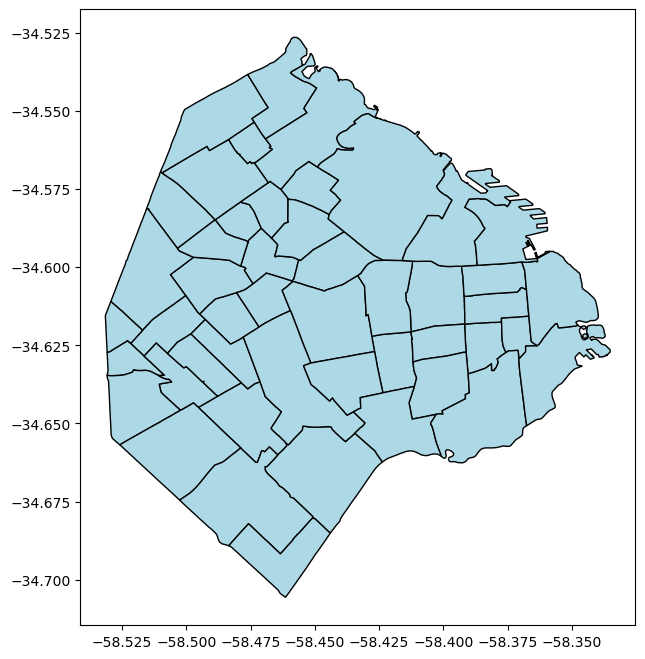

In [109]:
gdf.plot(figsize=(10, 8), color='lightblue', edgecolor='black')


<Axes: >

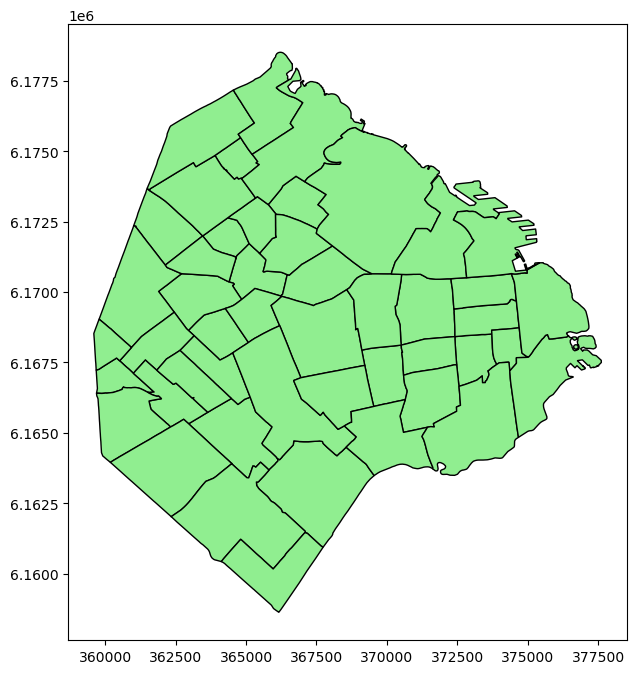

In [111]:
gdf_utm.plot(figsize=(10, 8), color='lightgreen', edgecolor='black')
